<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Zadachi_klassifikacii_i_klasterizacii/DZ_Kondrstev_STPY_48_clas_clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Преподаватель:** Олег Булыгин

### **Домашнее задание к лекции «Задачи классификации и кластеризации»**

Задание.

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [66]:
from sklearn.datasets import load_iris # Датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # импортируем LDA-функционал
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [67]:
# Загрузка данных из датасета iris
iris = load_iris()

In [ ]:
print(iris.DESCR)

In [69]:
# Создание DataFrame с признаками
data = pd.DataFrame(iris.data[:, :2], columns=iris.feature_names[:2])
variety = iris.target

In [ ]:
data

In [ ]:
variety

In [72]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, variety, random_state=42)

In [73]:
lda = LinearDiscriminantAnalysis()

In [74]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [75]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [76]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

In [78]:
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

In [79]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

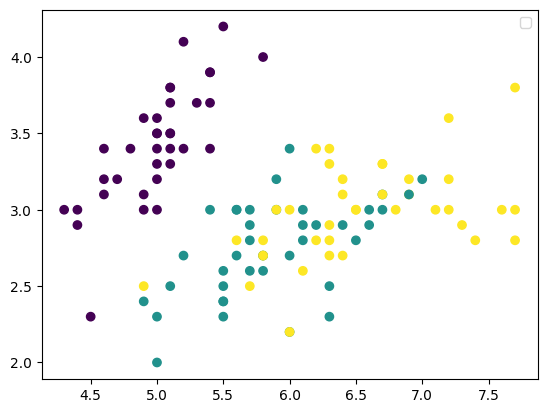

In [80]:
plt.scatter(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], c=y_train)
plt.legend()
plt.show()

In [81]:
# посмотрим на наши центроиды
lda.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

In [82]:
y_train

array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])

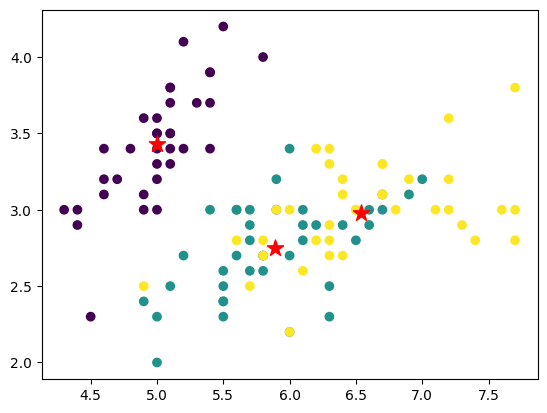

In [83]:
# сам scatter plot
plt.scatter(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

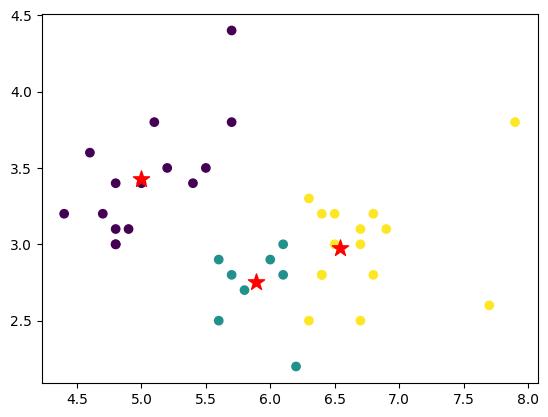

In [84]:
# визуализация разделения на тесте
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=lda.predict(X_test))
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [85]:
lda.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

In [86]:
# какая будет точность?
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

In [87]:
lr = LogisticRegression()

In [88]:
lr.fit(X_train, y_train)

LogisticRegression()

In [89]:
lr.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0])

In [ ]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(X_test)

In [91]:
accuracy_score(y_test, lr.predict(X_test))

0.8421052631578947